In [ ]:
import pandas as pd

flights = pd.read_excel('nycflights17.xlsx', sheet_name='flights')

<Axes: xlabel='distance', ylabel='air_time'>

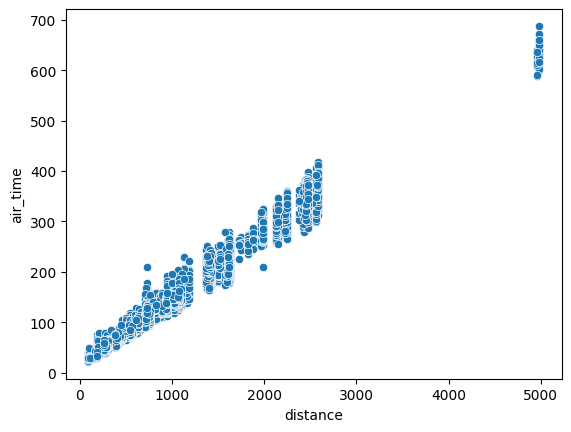

In [ ]:
import seaborn as sns

sns.scatterplot(x=flights.distance, y=flights.air_time)

In [ ]:
def plot_scatterline (x, y, m, b):
  ax = sns.scatterplot(x=x, y=y)
  sns.lineplot(x=x, y=m*x + b, ax=ax)

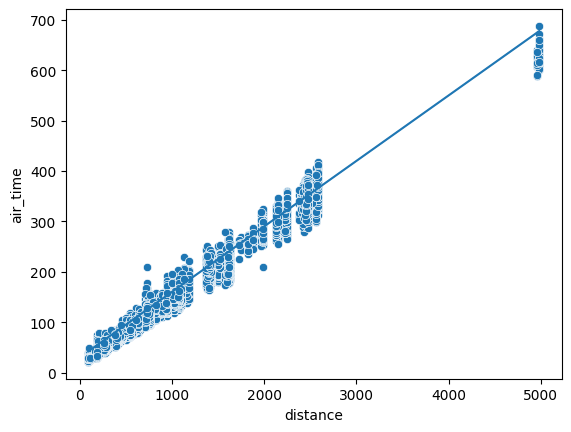

In [ ]:
flights = flights[['distance', 'air_time']].dropna()
x = flights.distance
y = flights.air_time
m = 0.13
b = 30
plot_scatterline(x, y, m, b)

In [ ]:
def predict (x, m, b):
  return m * x + b

In [ ]:
import numpy as np

def error (y, y_pred):
  return np.mean(np.power(y - y_pred, 2))

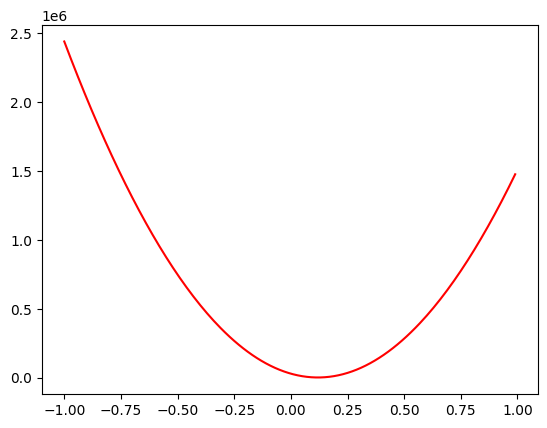

In [ ]:
def plot_error_vs_m (x, y, b):
  errors = []
  m_vals = np.arange(-1, 1, 1e-2)
  for m in m_vals:
    y_pred = predict(x, m, b)
    errors.append(error(y, y_pred))
  sns.lineplot(x=m_vals, y=errors, color='r')

plot_error_vs_m(x, y, b)

In [ ]:
from sympy import symbols, diff
x_, y_, m_, b_ = symbols('x, y, m, b')
y_pred_ = m_ * x_ + b_
mse = (y_ - y_pred_) ** 2

In [ ]:
diff(mse, m_)

-2*x*(-b - m*x + y)

In [ ]:
diff(mse, b_)

2*b + 2*m*x - 2*y

In [ ]:
n = len(x)
sxy = np.sum(x * y)
sx = np.sum(x)
sy = np.sum(y)
sx2 = np.sum(x ** 2)

m = (n * sxy - sx * sy) / (n * sx2 - sx ** 2)
b = (sy - m * sx) / n
print("m = ", m)
print("b = ", b)

m =  0.12741203455151112
b =  16.72936825300901


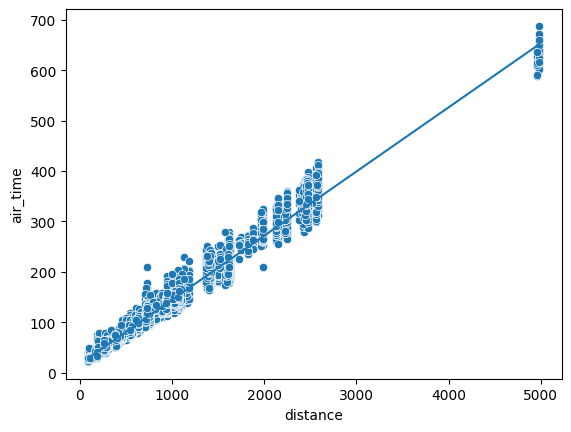

In [ ]:
plot_scatterline(x, y, m, b)

In [ ]:
from sklearn.linear_model import LinearRegression

# 1 - Instanciar el modelo
linr = LinearRegression()

# 2 - Entrenar el modelo
X = np.array(x).reshape(-1, 1)
linr.fit(X, y)

# 3 - Predecir
y_pred = linr.predict(X)

In [ ]:
print(y)

0        151.0
1         89.0
2        153.0
3        163.0
4        318.0
         ...  
15182    157.0
15183    162.0
15184    345.0
15185    196.0
15186    209.0
Name: air_time, Length: 14729, dtype: float64


In [ ]:
# Error medio absoluto
np.mean(np.abs(y - y_pred))

9.431444898910906